In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

: 

In [ ]:
# Download stopwords
nltk.download('stopwords')

: 

In [ ]:
# Load the dataset
df = pd.read_csv('twitter.csv', encoding='ISO-8859-1')

# Check the dataset
df.sample(5)

: 

In [22]:
# Define a text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')]
    return ' '.join(text)

# Apply the cleaning function
df['clean_text'] = df['text'].apply(clean_text)

# Check the cleaned text
print(df[['text', 'clean_text']].head())

                                                text  \
0  @MopedEyes i love that song still! i found the...   
1  @ellieowen1 Honestly, it depends on the woman....   
2  Well all I can say is the English had better w...   
3  Hey guys I'm going to create an iPhone app tha...   
4  they let me leave work  heading into Boston no...   

                                          clean_text  
0               love song still found cd bought like  
1  honestly depends woman love dresses tend dip l...  
2  well say english better watch cause scots girl...  
3  hey guys im going create iphone app thats twit...  
4  let leave work heading boston start drinking e...  


In [24]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the cleaned text
X = tfidf.fit_transform(df['clean_text']).toarray()

# Extract target values
y = df['target'].values

In [25]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print(f'Training set: {X_train.shape}, Testing set: {X_test.shape}')


Training set: (8000, 5000), Testing set: (2000, 5000)


In [35]:
# Initialize the model
model = LogisticRegression(max_iter=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [36]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       988
           1       0.73      0.73      0.73      1012

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000

Confusion Matrix:
[[715 273]
 [269 743]]


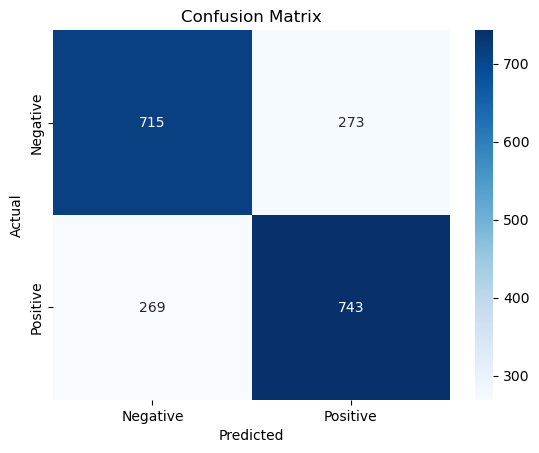

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()